In [1]:
from pathlib import Path
from gtp.dataloading.tools import load_json
from collections import defaultdict

OUTPUT_DIR = Path("/local/scratch/carlyn.1/dna/training_output/pca_10/")

species = "erato"
color = "total"
wing = "forewings"

plot_data = defaultdict(list)
for chromosome in range(1, 22):
    exp_dir = OUTPUT_DIR / f"{species}_{wing}_{color}_chromosome_{chromosome}"
    test_results = load_json(exp_dir / "test_metrics.json")
    val_results = load_json(exp_dir / "validation_metrics.json")

    plot_data["test_rmse"].append(test_results["rmse"])
    plot_data["val_rmse"].append(val_results["rmse"])
    
    plot_data["test_pearsonr"].append(test_results["pearsonr"])
    plot_data["val_pearsonr"].append(val_results["pearsonr"])
    
    plot_data["test_pvalue"].append(test_results["pvalue"])
    plot_data["val_pvalue"].append(val_results["pvalue"])
    

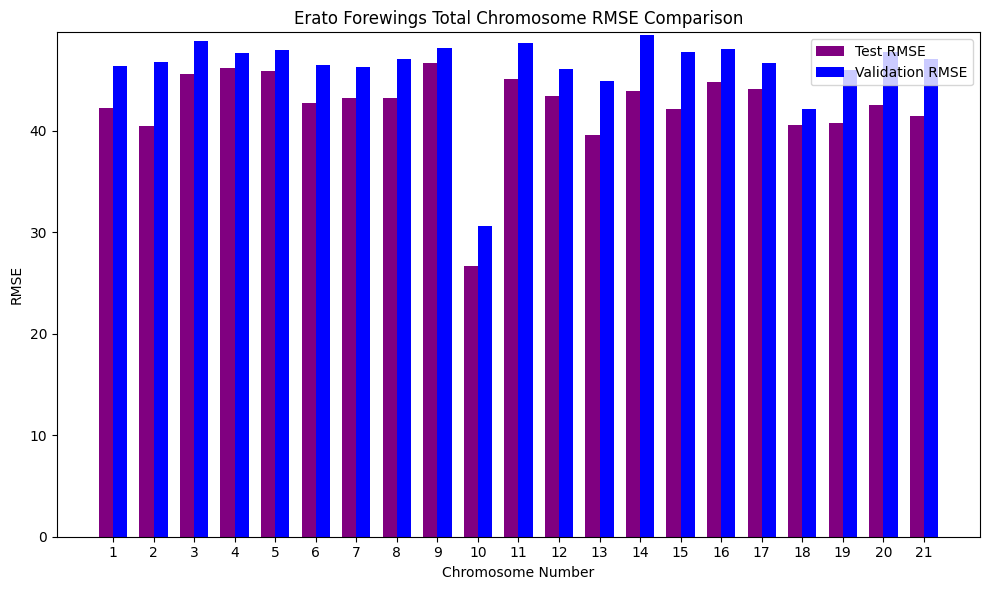

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results(metric: str):
    plt.figure(figsize=(10, 6))
    w = 0.35
    plt.title(f'{species.capitalize()} {wing.capitalize()} {color.capitalize()} Chromosome {metric.upper()} Comparison')
    plt.xlabel('Chromosome Number')
    
    if metric == "pvalue":
        plt.bar(np.array(list(range(1, 22))) - w/2, -np.log(plot_data[f"test_{metric}"]), width=w, label=f'Test {metric.upper()}', color="purple")
        plt.bar(np.array(list(range(1, 22))) + w/2, -np.log(plot_data[f"val_{metric}"]), width=w, label=f'Validation {metric.upper()}', color="blue")
        plt.ylabel(metric.upper())
        plt.ylim(0, -np.log(1e-26))
        plt.hlines(-np.log(0.05/21), xmin=0, xmax=22, color='red', linestyle='dashed', label='Significance Threshold (0.05)')
    else:
        plt.bar(np.array(list(range(1, 22))) - w/2, plot_data[f"test_{metric}"], width=w, label=f'Test {metric.upper()}', color="purple")
        plt.bar(np.array(list(range(1, 22))) + w/2, plot_data[f"val_{metric}"], width=w, label=f'Validation {metric.upper()}', color="blue")
        plt.ylabel(metric.upper())
        plt.ylim(0, max(max(plot_data[f"test_{metric}"]), max(plot_data[f"val_{metric}"])) + 0.3)
    plt.xticks(range(1, 22))
    plt.legend()
    #plt.grid('off')
    plt.tight_layout()
    plt.show()
    
plot_results(metric="rmse")

In [ ]:
plot_results(metric="pvalue")

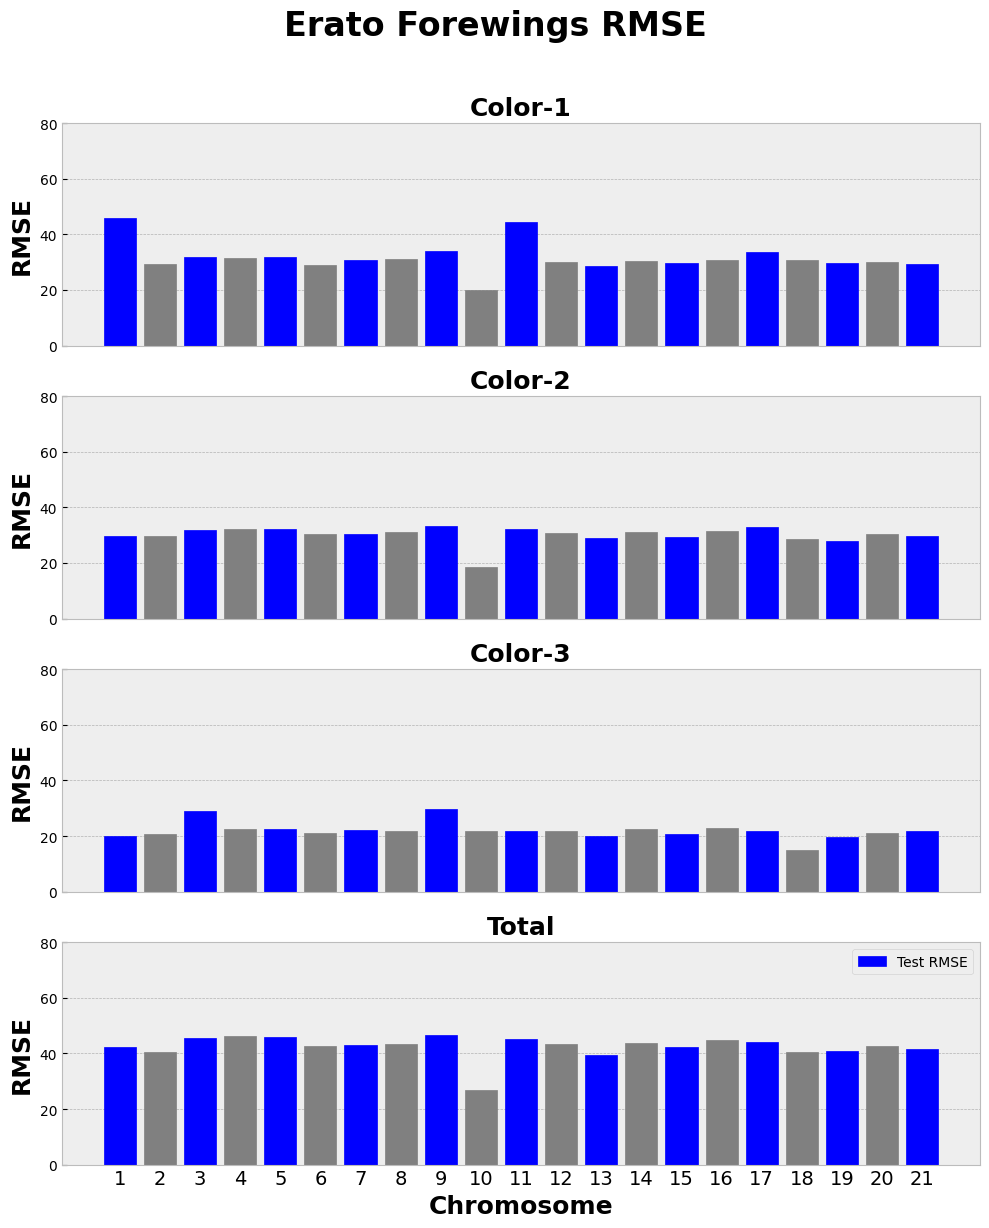

In [5]:
import pandas as pd

plt.style.use("bmh")

metric = "rmse"

fig, ax = plt.subplots(4,1, figsize=(10,12), sharex=True)

main_species = "erato"
main_wing = "forewings"

options = [
    (main_species, "color_1", main_wing),
    (main_species, "color_2", main_wing),
    (main_species, "color_3", main_wing),
    (main_species, "total", main_wing),
]
for j, opt in enumerate(options):
    species = opt[0]
    color = opt[1]
    wing = opt[2]

    plot_data = defaultdict(list)
    plot_data_to_save = []
    for chromosome in range(1, 22):
        exp_dir = OUTPUT_DIR / f"{species}_{wing}_{color}_chromosome_{chromosome}"
        test_results = load_json(exp_dir / "test_metrics.json")
        val_results = load_json(exp_dir / "validation_metrics.json")

        plot_data["test_rmse"].append(test_results["rmse"])
        plot_data["val_rmse"].append(val_results["rmse"])
        
        plot_data["test_pearsonr"].append(test_results["pearsonr"])
        plot_data["val_pearsonr"].append(val_results["pearsonr"])
        
        plot_data["test_pvalue"].append(test_results["pvalue"])
        plot_data["val_pvalue"].append(val_results["pvalue"])
        
        plot_data_to_save.append([chromosome, test_results["rmse"], val_results["rmse"]])
        
    df = pd.DataFrame(plot_data_to_save, columns=["chromosome", "test_rmse", "val_rmse"])
    df.to_csv(f"rmse_results_{species}_{color}_{wing}.csv")

    #ax[j].set_title(f'{species.capitalize()} {wing.capitalize()} {color.capitalize()} Chromosome {metric.upper()} Comparison', fontdict=dict(weight="bold", size=18))
    ax[j].set_title(f'{color.capitalize().replace("_", "-")}', fontdict=dict(weight="bold", size=18))
    
    if j == 3:
        ax[j].set_xlabel('Chromosome', fontdict=dict(weight="bold", size=18))

    bars = ax[j].bar(np.array(list(range(1, 22))), plot_data[f"test_{metric}"], label=f'Test {metric.upper()}', color="purple")
    for i, bar in enumerate(bars):
        color = 'blue' if i % 2 == 0 else 'grey'
        bar.set_color(color)

    ax[j].set_ylabel(metric.upper(), fontdict=dict(weight="bold", size=18))
    ax[j].set_ylim(0, 80)
    ax[j].set_xticks(range(1, 22), range(1, 22), fontdict=dict(size=14))
    ax[j].grid(False)
    ax[j].set_axisbelow(True)
    ax[j].grid(True, axis='y', linestyle='--')

fig.suptitle(f'{main_species.capitalize()} {main_wing.capitalize()} {metric.upper()}', fontsize=24, fontweight='bold', y=1.02)

plt.legend()
plt.tight_layout()
plt.show()